# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller subproblems on your own.

Additional guidance is provided for concepts that did not make into our class discussion. 

# Topic: My preferred Single Factor Model (simplified Quadratic Model)

Research shows that a single factor model with time-varying beta is driving out other FF factors. My preferred model is to have a time-varying beta. The simplest way is to use rolling window regressions for getting time-varying beta.

$$
\\
$$

CAPM with a time-varying beta

$$
\\
$$

$$
r_t - r_f = \alpha + \beta_{t-1} \; \times \;  f_t + \epsilon_t, \qquad \text{with} \;  \beta_{t-1} \equiv \frac{cov_{t-1}(r_t, f_t)}{var_{t-1}(f_t)}
$$

$$
\\
$$

Notice: the timing is important, $\beta_{t-1}$ vs $f_t$ and $\epsilon_t$
 

## Time-varying Beta allows to compute interesting quantities, e.g. time-varying systematic risk, time-varying correlations and more and relates nicely to factor analysis with time-varying factor loadings.

$$
\\
$$

My reading of the literature is that accounting for time-varying factor loadings is at least as important as findings the proper factors. 
$$
\\
$$

**MU's preferred linear dependence structure**
$$
Var_{t-1}(r_t) = \beta^2_{t-1} \times Var_{t-1}(f_t) + Var_{t-1}(\epsilon_t), \qquad R^2_t:= \frac{\beta^2_{t-1} \times Var_{t-1}(f_t) }{\beta^2_{t-1} \times Var_{t-1}(f_t) + Var_{t-1}(\epsilon_t)}
$$
 





# Your Learning Points

you will practice 

- estimating time-varying beta using rolling window regressions
$$
\\
$$

- factor structure in beta
$$
\\
$$

- time-varying correlations
$$
\\
$$

- Estimating time-varying vol using SVM
 

# Tasks for a Quick Way to Get a Glance on Time-Varying Co-movement with Market
$$
\\
$$

**Notice:**  **R_d.csv** contains merged data for FF7, Rf and SP500 constituents 

$$
\\
$$

**A.1** Compute a function that computes rolling-window GLS univariate regressions for any window size. 

**A.2** Compute rolling window betas with a window size of 252 trading days. Use the (normalized) first principal component of US returns as the single index factor. That time-series is given (or can be computed if you wish so).
 
**A.3** Plot the resulting beta time-series for the hypthetical 'median' US company. Do you consider the movement to be volatile, [yes/no]? Why is the magnitude of that beta not fluctuating around 1?


**A.4** How many linear factors are necessary to explain at least 80% of variations in cross-sectional betas?


**A.5** Compute for all firms and for all time points the relative amount of systematic risk that is embedded in each stock's return. Use the pandas.describe() function to get a feeling for the dispersion of betas for firms. How realistics are results in your view?


**A.6** Use results from **A.2** to compute time-varying correlations. How many PCs are necessary to drive at least 70% of variations in cross-sectional correlations. When plotting the first principal component of correlations, can you spot why industry says 'diversification disappears when you need it most'?



**A.7** Define a crash subset to be periods that coincide with periods of 3 and more standard deviations in the underlying first principal component of return volatility. Use this definition of a crash to find the single firm that has the lowest correlation with the market during periods of market crashes. What is the business model of that firm? How realistic is the finding in you opinion?






 




In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV
from sklearn.decomposition import PCA
import statsmodels.api as sm
from ipynb.fs.defs.Helper_FamaMacBeth import FMacBeth

In [2]:
def extractFactors(data):
    ff7 = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_x', 'ST_Rev', 'Mom   ']]
    rf = data[["RF_x"]]
    r = data[data.columns[8:]]
    return (r,ff7,rf)

In [3]:
data = pd.read_csv("R_d.csv", parse_dates=True, index_col=0)
(r,ff7,rf) = extractFactors(data)

In [4]:
(ff7[ff7.columns[0]])[252:504]

Date
2001-01-03    0.0539
2001-01-04   -0.0130
2001-01-05   -0.0298
2001-01-08   -0.0036
2001-01-09    0.0051
               ...  
2002-01-02    0.0042
2002-01-03    0.0099
2002-01-04    0.0070
2002-01-07   -0.0070
2002-01-08   -0.0023
Name: Mkt-RF, Length: 252, dtype: float64

In [5]:
def rollingWindowGls(y,x,window):  
    betas = np.empty((len(x)-window+1), float)

    for i in range(len(y)-window+1):
        x_w = x[i:i+window]
        y_w = y[i:i+window]

        res = sm.GLS(y_w,sm.add_constant(x_w)).fit()
        betas[i] = res.params[1]
    
    return betas

In [6]:
pca = PCA(n_components=1)
pca.fit(stats.zscore(r))
pca1_ts = stats.zscore(pca.transform(stats.zscore(r)))

In [7]:
b = rollingWindowGls(stats.zscore(r[r.columns[0]]),pca1_ts,252)

In [8]:
rw_beta_df = pd.DataFrame(index=r.index.copy())
rw_beta_df = rw_beta_df.iloc[251:]

for ticker in r: 
    print(ticker)   
    y_dat_rw = r[ticker]

    roll_beta = rollingWindowGls(stats.zscore(y_dat_rw), pca1_ts, 252)
    
    rw_beta_df[ticker] = roll_beta

MMM
ABT
ABMD
ATVI
ADBE
AMD
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
LNT
ALL
MO
AMZN
AEE
AEP
AXP
AIG
AMT
ABC
AME
AMGN
APH
ADI
ANSS
AON
AOS
APA
AIV
AAPL
AMAT
ADM
AJG
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK-B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
BF-B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CAT
CNP
CERN
SCHW
CVX
CB
CHD
CI
CINF
CTAS
CSCO
C
CTXS
CLX
CMS
KO
CTSH
CL
CMCSA
CMA_y
CAG
COP
ED
STZ
COO
CPRT
GLW
COST
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
XRAY
DVN
DISH
DLTR
D
DOV
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EA
EMR
ETR
EOG
EFX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPD
XOM
FFIV
FAST
FRT
FDX
FITB
FE
FISV
FLIR
FLS
FMC
F
BEN
FCX
GPS
IT
GD
GE
GIS
GPC
GILD
GL
GS
GWW
HAL
HIG
HAS
PEAK
HSIC
HSY
HES
HFC
HOLX
HD
HON
HRL
HST
HPQ
HUM
HBAN
IEX
IDXX
ITW
INCY
INTC
IBM
IP
IPG
IFF
INTU
IVZ
IRM
JKHY
J
JBHT
SJM
JNJ
JCI
JPM
JNPR
KSU
K
KEY
KMB
KIM
KLAC
KR
LB
LHX
LH
LRCX
LEG
LEN
LLY
LNC
LIN
LMT
L
LOW
MTB
MRO
MAR
MMC
MLM
MAS
MKC
MXIM
MCD
MCK
MDT
MRK
MTD
MGM
MCHP
MU
MSFT
MAA
MHK
TAP
MNST
MCO
MS
MOS
MSI
NOV
NTAP
NWL
NEM
NE

<AxesSubplot:xlabel='Date'>

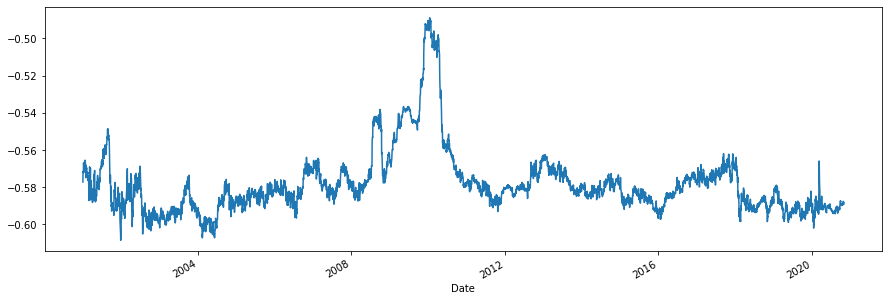

In [12]:
(rw_beta_df).median(axis=1).plot(figsize=(15,5))

In [14]:
pca = PCA()
pca.fit(stats.zscore(rw_beta_df))
pca1_betas_ts = stats.zscore(pca.transform(stats.zscore(rw_beta_df)))

In [27]:
np.cumsum(pca.explained_variance_ratio_[:15])

array([0.26520594, 0.39794974, 0.5193919 , 0.59970729, 0.64848923,
       0.69196667, 0.73035239, 0.76132836, 0.7916664 , 0.81629385,
       0.83758749, 0.85585691, 0.87266566, 0.88695863, 0.89904259])

In [25]:
[i + 1 for i in range(len(np.cumsum(pca.explained_variance_ratio_))) if np.cumsum(pca.explained_variance_ratio_)[i]>0.8][0]

10

In [62]:
eps = pd.DataFrame(index=(r[:-251]).index, columns=r.columns)

for i in range(len(r.col)):
    eps[eps.columns[i]] = stats.zscore(r[r.columns[1]][:-251]) - (np.dot(rw_beta_df[rw_beta_df.columns[1]],pca1_ts[:-251]))


In [63]:
eps.describe()

,MMM,ABT,ABMD,ATVI,ADBE,AMD,AES,AFL,A,APD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,...,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,-12.961518,-9.840047,-9.575667,-12.834008,-9.053976,-12.481864,-1.903731,9.820643,-19.054184,-6.424201,...,-10.626998,-9.686203,-13.104597,17.378100,-4.336364,-6.306469,-15.521745,-12.282965,-14.922653,-3.555835
std,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,...,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100,1.000100
min,-22.518941,-21.727936,-19.715639,-24.595545,-21.937711,-22.237268,-22.282705,-10.322979,-30.754341,-14.127351,...,-21.185858,-49.452826,-19.821867,-8.027124,-31.173451,-16.941824,-23.939112,-25.235431,-26.453950,-13.605344
25%,-13.413030,-10.322210,-10.025853,-13.290472,-9.472858,-12.957570,-2.251252,9.468286,-19.445993,-6.902325,...,-11.060837,-10.082728,-13.583943,17.063668,-4.699526,-6.714274,-15.933235,-12.735821,-15.370678,-3.927195
50%,-12.950057,-9.842915,-9.578235,-12.831706,-9.048141,-12.485913,-1.879475,9.828357,-19.040398,-6.416148,...,-10.629675,-9.671334,-13.110446,17.393860,-4.324084,-6.304345,-15.514380,-12.283525,-14.929094,-3.544008
75%,-12.477800,-9.323017,-9.139204,-12.380785,-8.635135,-12.000331,-1.530159,10.154673,-18.638942,-5.928904,...,-10.194788,-9.265463,-12.617028,17.715093,-3.932345,-5.897291,-15.093034,-11.828346,-14.478620,-3.175369
max,-5.765165,-1.952485,-2.670872,-5.102705,-1.249397,-2.011869,8.359641,21.380410,-4.739087,1.534642,...,-1.517280,-4.262721,-5.617702,36.185993,7.970632,5.477962,-9.520983,-4.392651,-6.246553,5.127134


In [64]:
##SVM onto eps_algn_df

Var_tm1_epst = pd.DataFrame(index=eps.index)

for ticker in eps:
    print(ticker)
    SVM_ = QLSV( eps[ticker] - eps[ticker].mean()).fit(cov_type='robust')
    Var_tm1_epst[ticker] = np.exp(SVM_.smoothed_state[0]/2)

MMM
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
ABT
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
ABMD
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
ATVI
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning

,MMM,ABT,ABMD,ATVI,ADBE,AMD,AES,AFL,A,APD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,...,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,0.788369,0.832714,0.751942,0.759553,0.762343,0.785444,0.672499,0.670313,0.737487,0.819854,...,0.752397,0.699386,0.803657,0.604276,0.661658,0.722142,0.791032,0.775548,0.739755,0.717391
std,0.336974,0.339722,0.309647,0.345026,0.459347,0.289934,0.455830,0.544406,0.418217,0.423734,...,0.371419,0.324691,0.371767,0.411911,0.419773,0.414133,0.500426,0.350794,0.292271,0.591889
min,0.299320,0.404734,0.272586,0.216197,0.237500,0.283803,0.265481,0.196971,0.275803,0.237577,...,0.263274,0.271342,0.284935,0.155701,0.231386,0.293592,0.253335,0.331740,0.236100,0.215959
25%,0.564127,0.590651,0.545650,0.523894,0.495731,0.572273,0.401354,0.366387,0.456312,0.561240,...,0.489103,0.457571,0.561101,0.357321,0.450385,0.474446,0.470788,0.552872,0.534472,0.401680
50%,0.714947,0.728867,0.662189,0.668531,0.585996,0.724268,0.498544,0.500189,0.596424,0.701521,...,0.632351,0.609262,0.708474,0.459021,0.563689,0.567837,0.604008,0.670333,0.667713,0.519914
75%,0.913071,0.936046,0.872884,0.887058,0.801119,0.931909,0.737215,0.777099,0.811134,0.913434,...,0.867425,0.840478,0.931829,0.683088,0.724062,0.768935,0.843554,0.883639,0.890876,0.769646
max,2.421655,2.242902,1.666168,2.098541,2.477010,1.889622,2.688771,4.256912,2.441026,3.296431,...,2.080115,2.184435,2.596898,2.959047,4.033631,2.391779,2.664192,2.334137,1.896288,3.892872
